<a href="https://colab.research.google.com/github/00mhk00/DEEP-LEARNING-PROJECTS/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.
'''Labels
Each training and test example is assigned to one of the following labels:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot '''
# for further assistance https://www.kaggle.com/zalando-research/fashionmnist

'Labels\nEach training and test example is assigned to one of the following labels:\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot '

In [ ]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


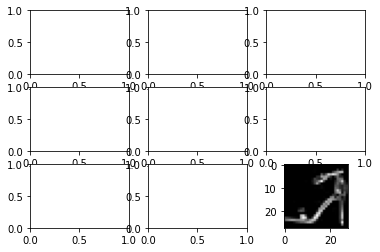

In [ ]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
# define subplot
 pyplot.subplot(330 + 1 + i)
# plot raw pixel data
pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# reshape dataset to have a single channel
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
##convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
#Nor. 0 to 1
train_X = train_X / 255
test_X = test_X / 255
# convert to one hot encoder (vector)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.9351 - accuracy: 0.6624
Epoch 2/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.6595 - accuracy: 0.7540
Epoch 3/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.5940 - accuracy: 0.7802
Epoch 4/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.5391 - accuracy: 0.8024
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.4998 - accuracy: 0.8169


In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 4s 382us/step
Test loss 0.5087297165870667
Test accuracy 0.8174999952316284


In [ ]:
#sinle Value predication in number (category)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

In [ ]:
#sinle Value predication in graph (plot)
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()